Copyright 2019 Anthony Ng.

&emsp;

Licensed under the Apache License, Version 2.0 (the "License");

you may not use this file except in compliance with the License.

You may obtain a copy of the License at


&emsp;https://www.apache.org/licenses/LICENSE-2.0


Unless required by applicable law or agreed to in writing, software

distributed under the License is distributed on an "AS IS" BASIS,

WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and

limitations under the License.

## Binary Classification Example

In [1]:
import numpy as np

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

2024-05-14 19:59:48.964990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Preparing the Training Data

Load [mnist](http://yann.lecun.com/exdb/mnist/) dataset as distributed with keras


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
tf.keras.backend.image_data_format()

'channels_last'

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
if tf.keras.backend.image_data_format() == 'channels_last':
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
y_train = np.where(y_train != 5, 0, 1)
# not digit 5, then y target convert to 0
# if it is digit 5, then y target is 1

In [7]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

## Network Architecture

In [8]:
batch_size = 128
num_classes = 1
epochs = 20

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])
model.summary()

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']) # Loss Function and Optimisers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Measure the Performance of the NN

In [9]:
x_val = x_train[50000:]
x_train_1 = x_train[:50000]
y_val = y_train[50000:]
y_train_1 = y_train[:50000]

In [10]:
h = model.fit(x_train_1,
              y_train_1,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 2s 3ms/step - loss: 0.2584 - accuracy: 0.9075 - val_loss: 0.1999 - val_accuracy: 0.9124
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1717 - accuracy: 0.9299 - val_loss: 0.1514 - val_accuracy: 0.9470
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1395 - accuracy: 0.9505 - val_loss: 0.1291 - val_accuracy: 0.9583
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9587 - val_loss: 0.1159 - val_accuracy: 0.9643
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9634 - val_loss: 0.1070 - val_accuracy: 0.9676
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1028 - accuracy: 0.9663 - val_loss: 0.1003 - val_accuracy: 0.9693
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9690 - val_loss: 0.0947 - val_accuracy: 0.9726
Epoch 

## Visualisation Performance

In [11]:
import matplotlib.pyplot as plt
loss_values = h.history['loss']
val_loss_values = h.history['val_loss']

epochs = range(1, len(h.history['accuracy']) + 1)

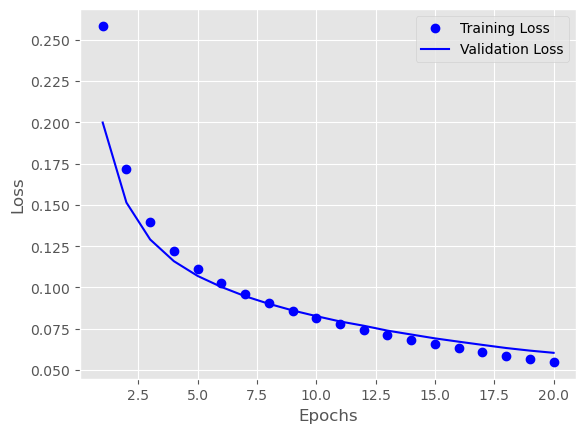

In [12]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo',
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

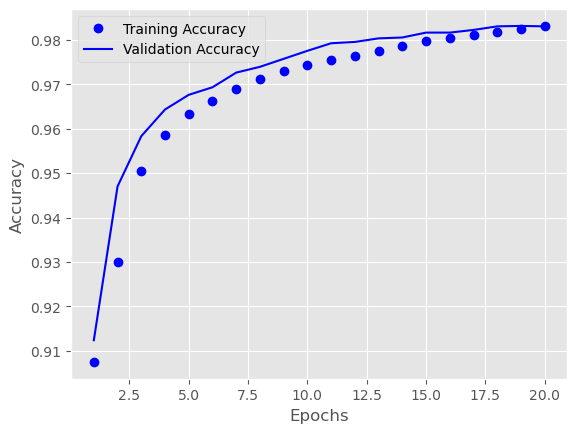

In [13]:
plt.clf()
acc_values = h.history['accuracy']
val_acc_values = h.history['val_accuracy']

plt.plot(epochs, acc_values, 'bo',
         label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

***